In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [11]:
column_names = ['Pelvic Incidence', 'Pelvic Tilt', 'Lumbar Lordosis Angle', 'Sacral Slope', 'Pelvic Radius', 'Grade of Spondylolisthesis', 'Class']
df = pd.read_csv('../data/vertebral_column_data/column_2C.dat',
            header=None, sep=' ', engine='python', names = column_names)

In [12]:
df.head(5)

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [13]:
#label encoding
df.loc[df['Class']=='AB','Class']=1
df.loc[df['Class']=='NO','Class']=0

# Preprocessing and Exploratory data Analysis

## Scatterplots

/Users/pallaviudatewar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


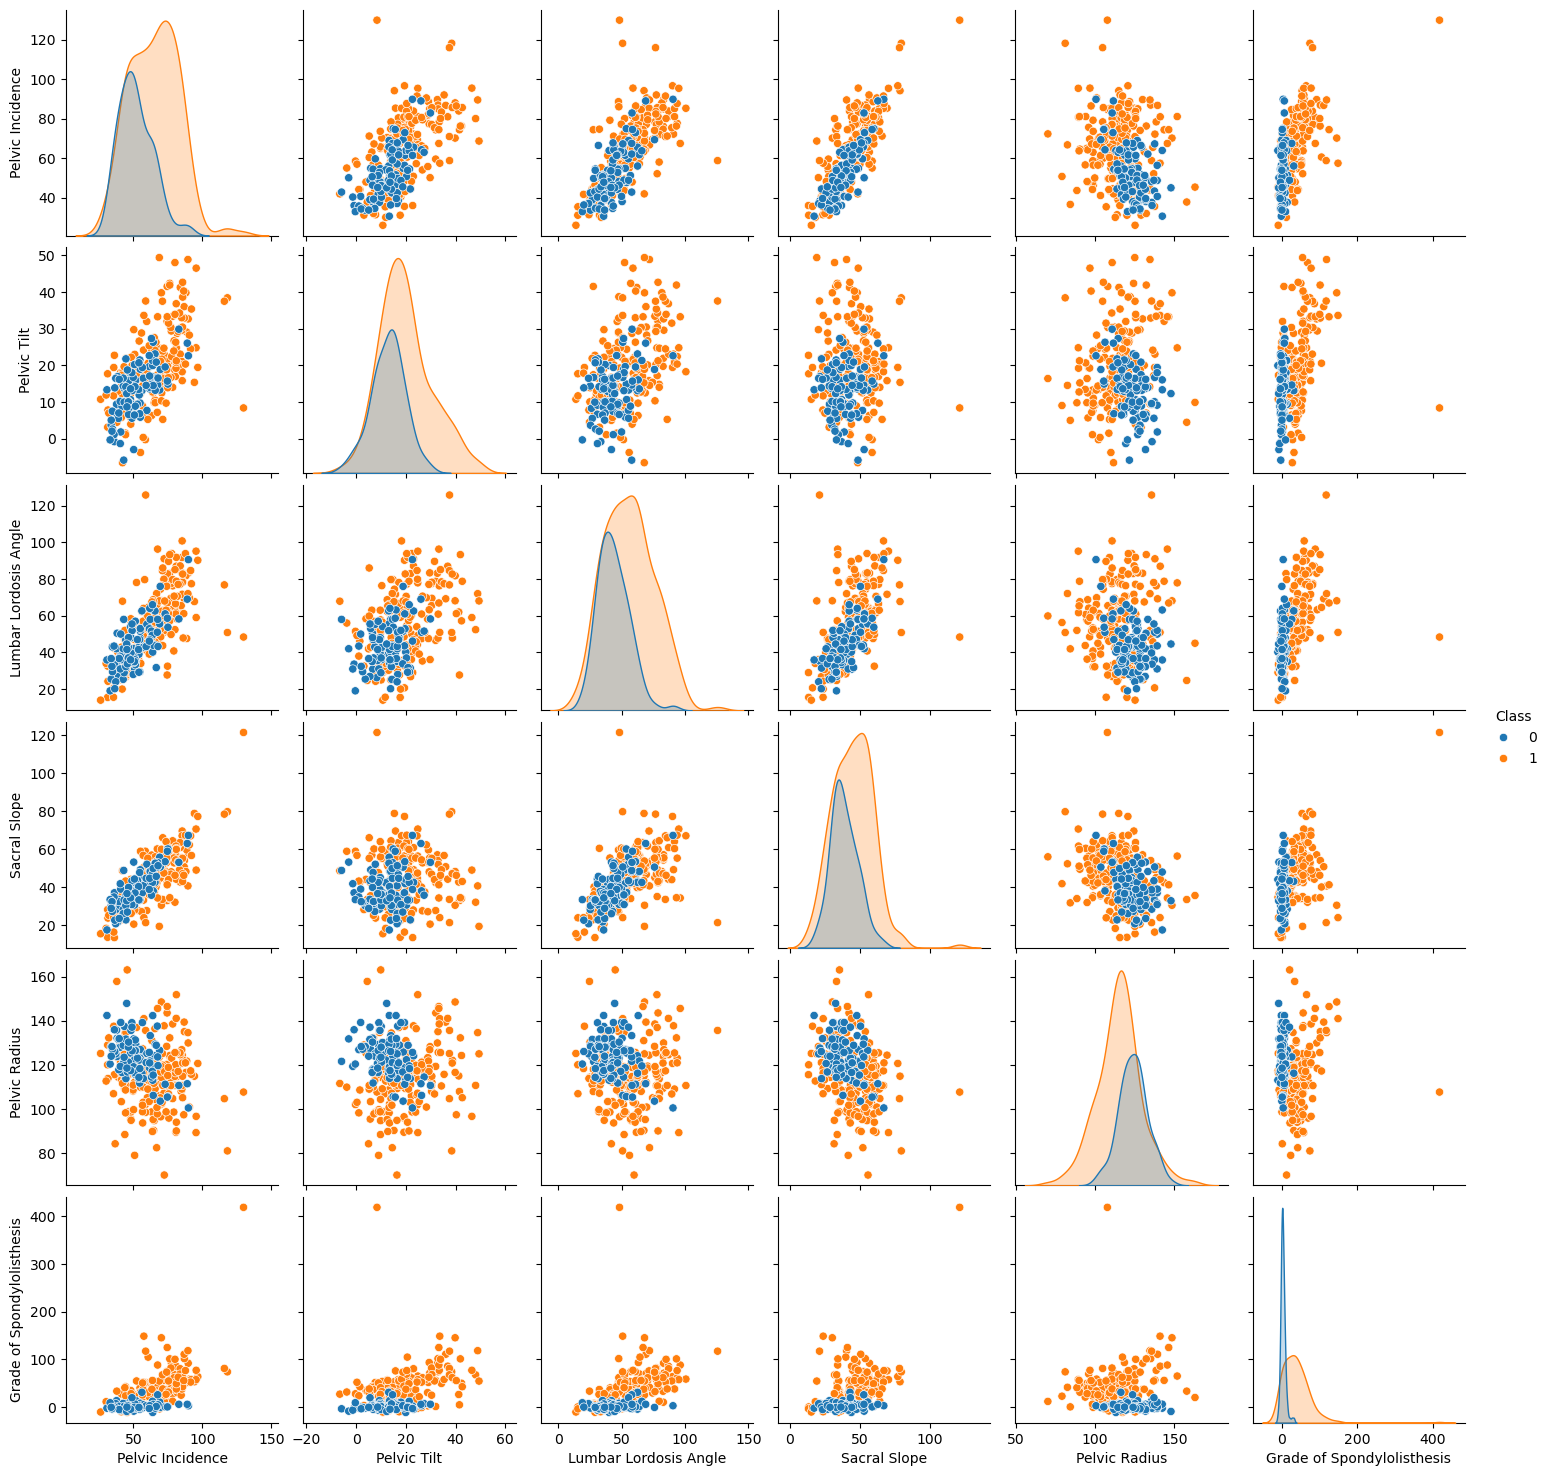

In [14]:
sns.pairplot(df, hue = 'Class')

#### Some variables show a clear distinction between the two classes in terms of distribution (e.g., the variable at the bottom row, 'Grade of Spondylolisthesis'), indicating that they might be good predictors for the class.

#### Some variables show skewed distributions, which might benefit from transformation (e.g., logarithmic) to improve model performance. (analyzed further)

## Boxplots

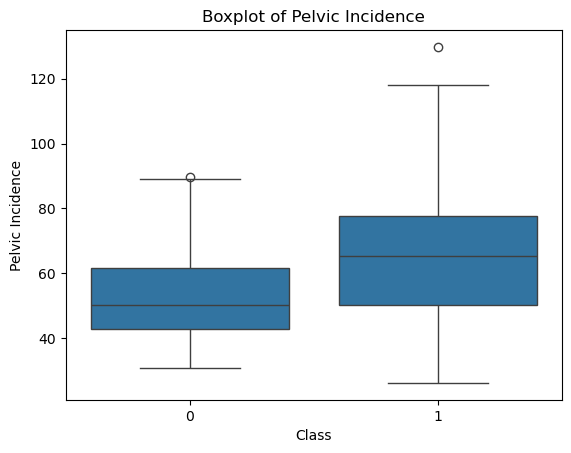

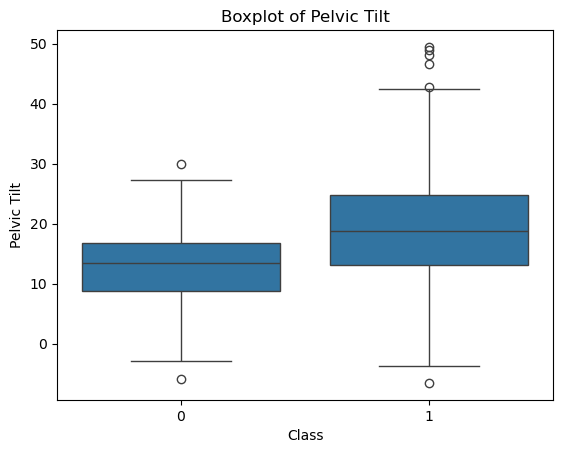

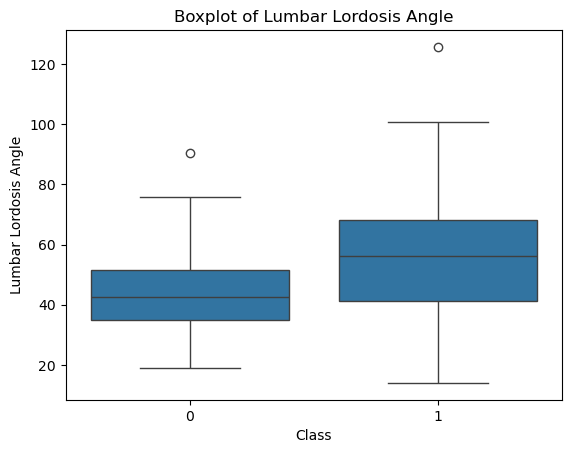

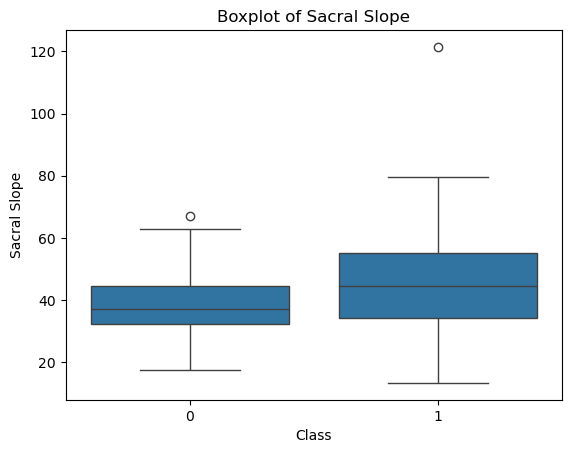

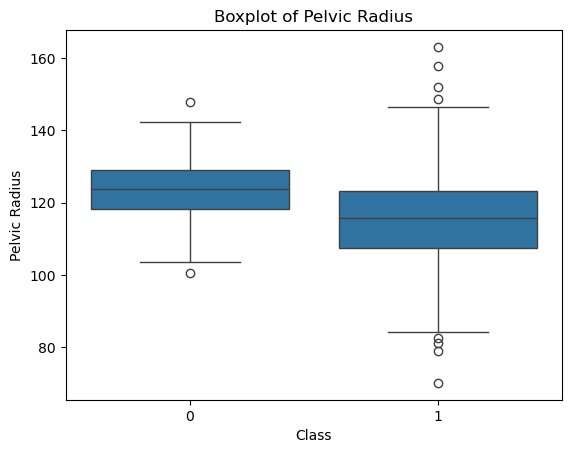

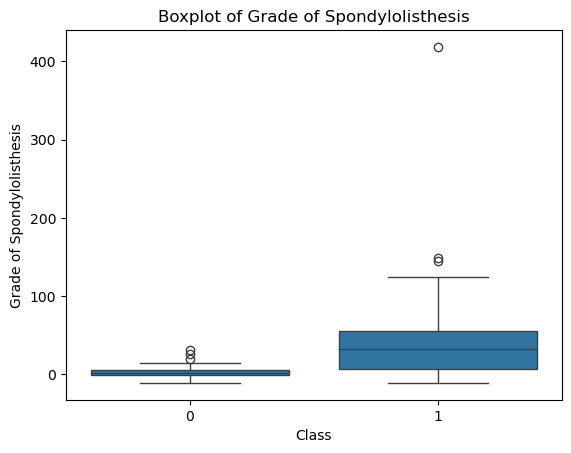

In [15]:
# Boxplots for each independent variable

for col in column_names:
    if col != "Class":
        plt.figure()
        sns.boxplot(x='Class', y=col, data=df)
        plt.title(f'Boxplot of {col}')
        plt.show()

#### Class Differences:   
Each biomechanical attribute displays differences in medians between the two classes, which may indicate that these attributes are influential in distinguishing between the two classes. Class 1 tends to have higher values in most attributes, except for Pelvic Radius, which is higher in Class 0.

#### Variability:   
Class 1 generally shows more variability in these attributes than Class 0, as indicated by the larger IQRs. This could mean that Class 1 is more heterogeneous or that the condition represented by Class 1 has a wider range of severities.

#### Outliers:   
The presence of outliers in both classes for various attributes indicates that there are cases that are significantly different from the norm. These could be due to natural variations, measurement errors, or differences in the conditions that the classes represent. Outliers may need to be investigated to ensure they are valid observations and not errors, as they can have a significant impact on statistical analyses and model performance.

#### Clinical Insights:  
In a clinical context, the attributes where Class 1 shows significantly higher values could be areas of interest for further investigation. They might be associated with a particular spinal condition that Class 1 represents.

#### Potential for Predictive Modeling:  
The differences in distribution between the two classes suggest that these attributes could be useful predictors in a machine learning model aimed at classifying individuals into Class 0 or Class 1.

## Distribution of classes

In [16]:
class_counts = df['Class'].value_counts()

print(class_counts)

Class
1    210
0    100
Name: count, dtype: int64


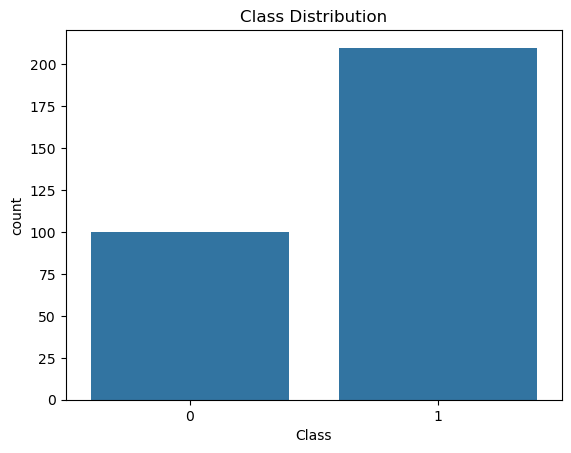

In [18]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

#### The class distribution indicates that there are 210 instances of Class 1 and 100 instances of Class 0. This shows that the dataset is imbalanced, with Class 1 having more than double the number of instances compared to Class 0.  

#### We can use resampling to adjust the training set to reflect the original distribution as closely as possible. Selected a subset to maintain the 1:2 ratio.

## Train-Test Split

In [19]:
train_0 = df[df['Class'] == 0].iloc[:70, :]
train_1 = df[df['Class'] == 1].iloc[:140, :]
train_data = pd.concat([train_0, train_1], ignore_index=True)

test_0 = df[df['Class'] == 0].iloc[70:, :]
test_1 = df[df['Class'] == 1].iloc[140:, :]
test_data = pd.concat([test_0, test_1], ignore_index=True)


In [20]:
train_data

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


In [21]:
X_train = train_data.iloc[:, :-1].astype('float')
y_train = train_data.iloc[:, -1].astype('float')

X_test = test_data.iloc[:, :-1].astype('float')
y_test = test_data.iloc[:, -1].astype('float')

In [22]:
X_train

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis
0,38.51,16.96,35.11,21.54,127.63,7.99
1,54.92,18.97,51.60,35.95,125.85,2.00
2,44.36,8.95,46.90,35.42,129.22,4.99
3,48.32,17.45,48.00,30.87,128.98,-0.91
4,45.70,10.66,42.58,35.04,130.18,-3.39
...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09
206,88.02,39.84,81.77,48.18,116.60,56.77
207,83.40,34.31,78.42,49.09,110.47,49.67
208,72.05,24.70,79.87,47.35,107.17,56.43


## K-nearest neighbors with Euclidean metric

In [23]:
# the metric is “minkowski”, which results in the standard Euclidean distance when p = 2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

knn_euclidean = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn_euclidean.fit(X_train, y_train)
y_pred = knn_euclidean.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:" , accuracy)
print("Confusion Matrix:\n" , cm)

Accuracy: 0.94
Confusion Matrix:
 [[25  5]
 [ 1 69]]


## Testing all the data in the test database with k nearest neighbors. Finding k*, the most suitable k among these values 



In [24]:
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

In [25]:
# Running KNN for various values of n_neighbors and storing results
train_error = []
test_error = []
k_values = []
for i in range(208, 0, -3):
    k_values.append(i)
    knn = KNeighborsClassifier(n_neighbors= i, metric = 'euclidean', p=2)
    knn.fit(X_train, y_train)
    test_score = 1 - knn.score(X_test, y_test)
    train_score = 1 - knn.score(X_train, y_train)
    train_error.append(train_score)
    test_error.append(test_score)

In [26]:
min_train_error = min(train_error)
print("The minimum training error is:", min_train_error)
k_value_min = k_values[np.argmin(train_error)]
print("the value of k for minumum training error is:",k_value_min)

The minimum training error is: 0.0
the value of k for minumum training error is: 1


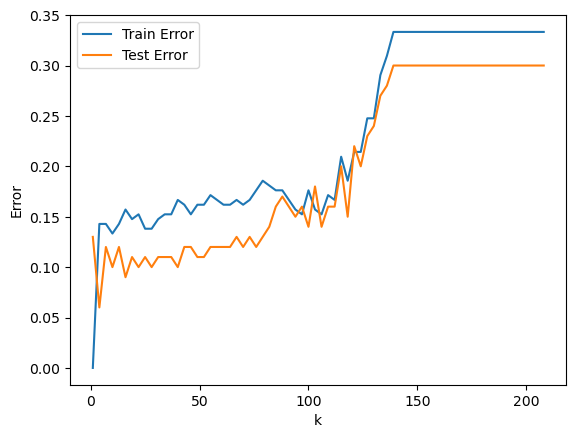

In [27]:
plt.plot(k_values, train_error, label='Train Error')
plt.plot(k_values, test_error, label='Test Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

#### High k Values:

For larger values of k, both the training error and test error are higher, suggesting that the model might be too simple and underfitting the data. It's not capturing the complexity of the relationships in the data.

#### Decreasing k Values:

As k decreases, the training error consistently decreases, which is expected because the model becomes more flexible and fits the training data more closely.
The test error initially decreases along with the training error, indicating that the model's generalization is improving.

#### Optimal Range of k:

There seems to be a point or a range where the test error is at its lowest before it starts to increase again. This represents the optimal complexity of the model where it best generalizes to new data. The exact value of k at this minimum would be considered the best choice for the KNN algorithm.

#### Low k Values and Overfitting:

For low values of k, the training error is very low, but the test error begins to rise, which is indicative of overfitting. The model is becoming too complex, capturing noise and specifics of the training data that do not generalize to the test data.

#### Divergence of Train and Test Error:

Towards the lower end of k values, the gap between the training and test errors widens significantly. This further supports the overfitting diagnosis, as the model performs well on the training data but poorly on the test data.


## K-Nearest Neighbors (KNN) Analysis Summary

We have implemented a KNN classifier to predict the outcomes based on our dataset. The classifier's performance was assessed using various values of `k` (the number of nearest neighbors). The key steps taken and outcomes are summarized below:

- We tested a range of `k` values: {208, 205, ..., 7, 4, 1}, decreasing in increments of 3, to determine the most suitable `k`.
- Majority polling was used for decision-making. This means the class that appears most frequently among the `k` nearest training samples is chosen as the prediction for each test instance.
- The model was evaluated by calculating both the training and test errors across the different `k` values to understand how the choice of `k` affects the model's accuracy and its ability to generalize to unseen data.
- To identify the optimal `k` value (denoted as `k*`), we looked for the value that minimized the test error, indicating the best trade-off between bias (underfitting) and variance (overfitting).
- We also computed key performance metrics, including the confusion matrix, true positive rate (sensitivity), true negative rate (specificity), precision, and F1-score, when `k = k*`. These metrics provide a more comprehensive view of the model's performance beyond simple error rates.


In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

k_star = k_values[np.argmin(test_error)]
print("The most suitable k among all values of k is:", k_star)

k_star_classifier = KNeighborsClassifier(n_neighbors=k_star, metric='euclidean')
k_star_classifier.fit(X_train, y_train)
y_pred_k_star = k_star_classifier.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred_k_star)
print("Confusion Matrix:\n", confusion_matrix)

TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
true_positive_rate = TP/(TP + FN)
true_negative_rate = TN/(TN + FP)
print("True Positive rate is", true_positive_rate)
print("True Negative rate is", true_negative_rate)

precision = precision_score(y_test, y_pred_k_star)
recall = recall_score(y_test, y_pred_k_star)
f1 = f1_score(y_test, y_pred_k_star)
accuracy = accuracy_score(y_test, y_pred_k_star)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('Accuracy:', accuracy)


The most suitable k among all values of k is: 4
Confusion Matrix:
 [[25  5]
 [ 1 69]]
True Positive rate is 0.9857142857142858
True Negative rate is 0.8333333333333334
Precision: 0.9324324324324325
Recall: 0.9857142857142858
F1-Score: 0.9583333333333333
Accuracy: 0.94


## Learning Curve Analysis

The learning curve analysis explores the relationship between the size of the training set and the KNN model's performance. This approach can shed light on the impact of training data volume on the computation time and model accuracy.

### Methodology
- We varied the size of the training set `N` through a predefined set {10, 20, 30, ..., 210}.
- For each `N`, we constructed the training set using the first `(N/3)` rows of Class 0 and the first `N - (N/3)` rows of Class 1.
- We then trained a series of KNN models, each time optimizing the value of `k`. The range for `k` started at 1 and increased in steps of 5 up to the size of the training set minus one (e.g., for `N = 200`, we considered `k` in {1, 6, 11, ..., 196}).
- The best test error rate obtained for each `N` was recorded.

### Plotting the Learning Curve
- A learning curve was plotted with the size of the training set on the x-axis and the corresponding best test error rate on the y-axis.
- This plot illustrates how the model's ability to generalize improves with the amount of training data and helps identify the point of diminishing returns where adding more data does not significantly improve model performance.

### Insights
- The learning curve provides critical insights into how much training data is required to effectively train the model and at what point more data might not contribute to better predictions.
- It also helps in understanding the computational trade-offs when working with larger datasets.


In [31]:
best_test_errors = []
for n in range(10, 211, 10):
    class0_n = n // 3  
    class1_n = n - class0_n 
    # vstack : vertically stacks the two subsets of features extracted for Class 0 and Class 1. 
    # This creates a new array where the first part contains features for Class 0 and the second part 
    # contains features for Class 1. This becomes the new feature set X_train_N for the training data.
    X_train_N = np.vstack((X_train[y_train == 0][:class0_n], X_train[y_train == 1][:class1_n]))
    # hstack : horizontally stacks the two subsets of labels for Class 0 and Class 1. This concatenates the class labels 
    # for the two classes into a new array y_train_N, which becomes the new label set for the training data.
    y_train_N = np.hstack((y_train[y_train == 0][:class0_n], y_train[y_train == 1][:class1_n]))
    test_errors = []
    for k in range(1, n, 5):
        knn_n = KNeighborsClassifier(n_neighbors=k)
        knn_n.fit(X_train_N, y_train_N)
        y_pred_n = knn_n.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred_n)
        test_errors.append(test_error)
    min_test_error = min(test_errors)
    best_test_errors.append(min_test_error)

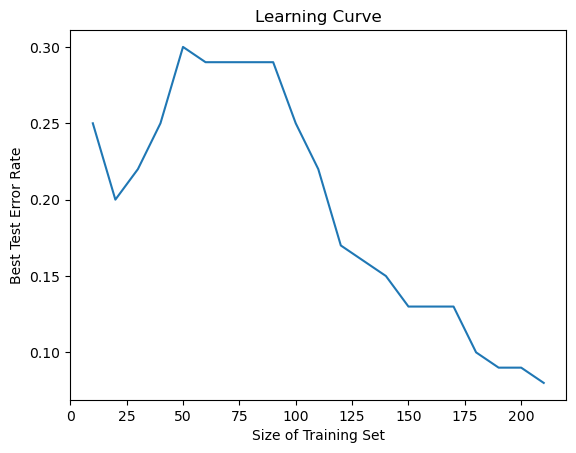

In [34]:
plt.plot(range(10, 211, 10), best_test_errors)
plt.xlabel('Size of Training Set')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.show()


As the size of the training set increases, the test error rate generally decreases. This suggests that the model is benefiting from more data, learning more general patterns that perform better on the test set.



## Distance Metric Analysis Using KNN

We have evaluated the KNN classifier's performance using various distance metrics to identify the most effective one for our dataset. The test errors were summarized for each distance metric at the optimal number of neighbors, `k*`. Here's an outline of the analysis process and the findings:

### Process
- We replaced the Euclidean distance metric with different metrics and tested their performance on the classification task.
- The optimal `k` (denoted as `k*`) was selected based on previous experiments with the Euclidean metric.
- The following distance metrics were tested:
    1. **Minkowski Distance**:
        - As a special case with `p=1`, it becomes the Manhattan Distance.
        - We also tested various values of `p` using the logarithmic scale, `log10(p)` ranging from `0.1` to `1` to determine the best `p`.
        - For `p` tending towards infinity, it becomes the Chebyshev Distance.
    2. **Mahalanobis Distance**:
        - This metric takes into account the covariance among the variables to normalize the scale of the feature space.

### Results
- We recorded the test errors for each metric and identified which yielded the lowest test error.
- A summary table was created to compare the test errors across different metrics with their respective optimal `k`.

### Insights
- The table of test errors provided insights into which distance metrics are most suitable for our dataset.
- The optimal `log10(p)` value for the Minkowski Distance was determined based on which value led to the lowest test error.

_The summary of test errors across distance metrics is available in the Results section._

Note: The `k*` values and the associated test errors for each distance metric should be tabulated in the Results section of this analysis.


In [33]:
test_error = []
k_values = []
for k in range(1,197,5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors= k, p=1, metric = 'minkowski')
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    test_score = classifier.score(X_test, y_test)
    error = 1 - test_score
    test_error.append(error)

manhattan_k_df = pd.DataFrame(columns=['k', 'Test Error'])
manhattan_k_df['k'] = k_values
manhattan_k_df['Test Error'] = test_error
display(manhattan_k_df)

,k,Test Error
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.12
5,26,0.11
6,31,0.12
7,36,0.13
8,41,0.13
9,46,0.13


In [34]:
k_star_d = k_values[np.argmin(test_error)]
print("The best k value with Manhattam distance is:", k_star_d)

The best k value with Manhattam distance is: 6


## Tested various values of p using the logarithmic scale, log10(p) ranging from 0.1 to 1 to determine the best p.

In [35]:
p_values = 10**np.arange(0.1, 1.1, 0.1)
log_p_values = []
test_error = []

for i in p_values:
    log_p_values.append(math.log10(i))

for p in p_values:
    knn_p = KNeighborsClassifier(n_neighbors=k_star_d, metric='minkowski', p=p)
    knn_p.fit(X_train, y_train)
    y_pred = knn_p.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    test_error.append(error)

log_p_df = pd.DataFrame(columns=['log10(p)', 'Test Error'])
log_p_df['log10(p)'] = log_p_values
log_p_df['Test Error'] = test_error
display(log_p_df)

,log10(p),Test Error
0,0.1,0.09
1,0.2,0.09
2,0.3,0.08
3,0.4,0.08
4,0.5,0.08
5,0.6,0.06
6,0.7,0.07
7,0.8,0.08
8,0.9,0.09
9,1.0,0.09


In [36]:
best_log_p = log_p_values[np.argmin(test_error)]
print("The best k value is:", best_log_p)

The best k value is: 0.6000000000000001


## Chebyshev Distance

In [37]:
import math
k_values = []
test_error = []
for k in range(1,197,5):
    k_values.append(k)
    knn_chebyshev = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski', p=math.inf)
    knn_chebyshev.fit(X_train, y_train)
    predicted = knn_chebyshev.predict(X_test)
    test_score = knn_chebyshev.score(X_test, y_test)
    error = 1-test_score
    test_error.append(error)
chebyshev_k_df = pd.DataFrame(columns=['k', 'Test Error'])
chebyshev_k_df['k'] = k_values
chebyshev_k_df['Test Error'] = test_error
display(chebyshev_k_df)

,k,Test Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.08
4,21,0.11
5,26,0.12
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.12


In [38]:
k_star_chebyshev = k_values[np.argmin(test_error)]
print("The best k value with chebyshev distance is:", k_star_chebyshev)

The best k value with chebyshev distance is: 16


## Mahalanobis Distance

In [39]:
test_error = []
for i in range(1, 197, 5):
    covar = np.cov(X_train, rowvar=False)
    knn_mahalanobis = KNeighborsClassifier(n_neighbors=i, algorithm='auto', metric='mahalanobis',metric_params={'VI': np.linalg.pinv(covar)})
    knn_mahalanobis.fit(X_train, y_train)
    predicted = knn_mahalanobis.predict(X_test)
    test_score = knn_mahalanobis.score(X_test, y_test)
    error = 1 - test_score
    test_error.append(error)

mahalanobis_k_df = pd.DataFrame(columns=['k', 'Test Error'])
mahalanobis_k_df['k'] = k_values
mahalanobis_k_df['Test Error'] = test_error
display(mahalanobis_k_df)

,k,Test Error
0,1,0.17
1,6,0.17
2,11,0.20
3,16,0.20
4,21,0.21
5,26,0.20
6,31,0.23
7,36,0.21
8,41,0.24
9,46,0.24


## Majority polling decision replace by weighted decision

### Majority polling decision replace by weighted decision - Euclidean Distance

In [43]:
euclidean_test_error = []
k_values = []
for k in range(1,197,5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski', p=2, weights ='distance')
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    test_score = classifier.score(X_test, y_test)
    euclidean_test_error.append(1-test_score)

min_index = np.argmin(euclidean_test_error)
euclidean_k = k_values[min_index]
euclidean_min_error = euclidean_test_error[min_index]


euclidean_k_df = pd.DataFrame(columns=['k', 'Test Error'])
euclidean_k_df['k'] = k_values
euclidean_k_df['Test Error'] = euclidean_test_error
display(euclidean_k_df)

,k,Test Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.11
4,21,0.11
5,26,0.11
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


###  Majority polling decision replace by weighted decision - Manhattan Distance

In [44]:
manhattan_test_error = []
k_values = []
for k in range(1,197,5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski', p=1, weights ='distance')
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    test_score = classifier.score(X_test, y_test)
    manhattan_test_error.append(1-test_score)

min_index = np.argmin(manhattan_test_error)
manhattan_k = k_values[min_index]
manhattan_min_error = manhattan_test_error[min_index]

manhattan_k_df = pd.DataFrame(columns=['k', 'Test Error'])
manhattan_k_df['k'] = k_values
manhattan_k_df['Test Error'] = manhattan_test_error
display(manhattan_k_df)

,k,Test Error
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.11
5,26,0.10
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


###  Majority polling decision replace by weighted decision - Chebyshev Distance

In [45]:
chebyshev_test_error = []
k_values = []
for k in range(1,197,5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski', p=math.inf, weights ='distance')
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    test_score = classifier.score(X_test, y_test)
    chebyshev_test_error.append(1-test_score)

min_index = np.argmin(chebyshev_test_error)
chebyshev_k = k_values[min_index]
chebyshev_min_error = chebyshev_test_error[min_index]

chebyshev_k_df = pd.DataFrame(columns=['k', 'Test Error'])
chebyshev_k_df['k'] = k_values
chebyshev_k_df['Test Error'] = chebyshev_test_error
display(chebyshev_k_df)

,k,Test Error
0,1,0.13
1,6,0.13
2,11,0.12
3,16,0.11
4,21,0.12
5,26,0.12
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.12


In [46]:
import pandas as pd
from IPython.display import display

data_dict = {
    'Euclidean': [euclidean_k, euclidean_min_error],
    'Manhattan': [manhattan_k, manhattan_min_error],
    'Chebyshev': [chebyshev_k, chebyshev_min_error]
}
print("The best error errors when k belongs to {1,6,11,16,....,196} is mentioned in the table below:")
table = pd.DataFrame(data_dict, index=['K', 'Test Error']).T.reset_index()
table.columns = ['Methods', 'K', 'Test Error']
display(table)

The best error errors when k belongs to {1,6,11,16,....,196} is mentioned in the table below:


,Methods,K,Test Error
0,Euclidean,6.0,0.10
1,Manhattan,26.0,0.10
2,Chebyshev,16.0,0.11


## f.

### The minimum training error is: 0.0
### The value of k for minumum training error is: 1

In [47]:
!pip freeze > requirements.txt

In [ ]:
# References:
# Reference: https://seaborn.pydata.org/generated/seaborn.boxplot.html
# Reference: https://towardsdatascience.com/k-nearest-neighbors-94395f445221
# Reference: https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier